<a href="https://colab.research.google.com/github/DEZE007/Quantum-Hackaton-CICC/blob/main/qrng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **QRNG** - *Quantum Random Number Generation*
* October 15°, 2025
#### CIC - IPN: *Qiskit Fall Fest*

> Alexander Sanchez

* How to install qiskit-aer:

You can install `qiskit-aer` using pip:

```bash
pip install qiskit-aer
```

Or if you prefer using conda:

```bash
conda install -c conda-forge qiskit-aer
```

**Note**: `qiskit-aer` is the high-performance simulator for Qiskit that provides noise models and advanced simulation capabilities. It's essential for running quantum circuits locally with realistic noise modeling.

In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=35e84f380852a06ad160c482262d845303c2bca977a10c67d2a4000f60e7c6db
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


* Define the quantum circuit

Quantum Circuit:


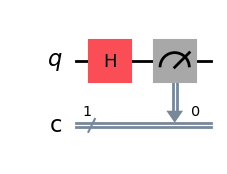

In [8]:
# Perform a quantum random number generation using Qiskit simulating locally
# and visualize the results with matplotlib and seaborn
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Set up the quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate to create superposition
qc.measure(0, 0)  # Measure the qubit

print("Quantum Circuit:")
qc.draw(output='mpl')

* Simulate the circuit


Measurement results: {'1': 499, '0': 525}


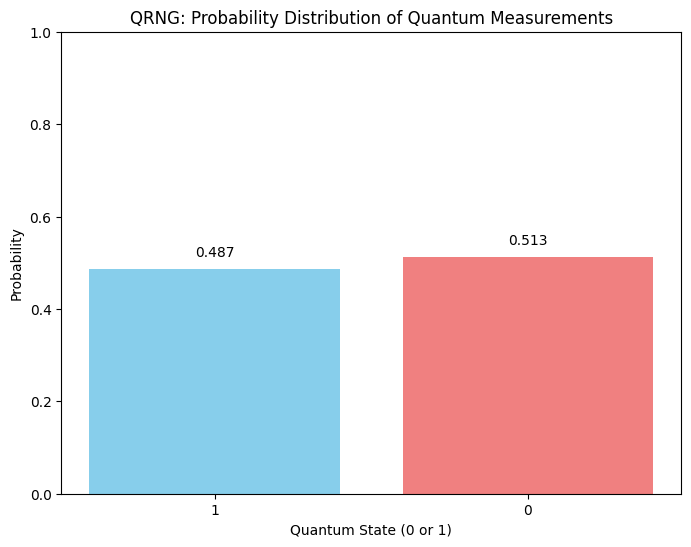

In [9]:
# Simulate the circuit
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1024)
# job = simulator.run(transpiled_circuit, shots=1024, seed_simulator=42)
result = job.result()
counts = result.get_counts()

print(f"\nMeasurement results: {counts}")

# Alternative visualization using matplotlib
plt.figure(figsize=(8, 6))
states = list(counts.keys())
probabilities = [counts[state]/1024 for state in states]

plt.bar(states, probabilities, color=['skyblue', 'lightcoral'])
plt.xlabel('Quantum State (0 or 1)')
plt.ylabel('Probability')
plt.title('QRNG: Probability Distribution of Quantum Measurements')
plt.ylim(0, 1)

# Add probability labels on bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.02, f'{prob:.3f}', ha='center', va='bottom')

plt.show()

* **Challenge**: Generate a random number (base 10) given a range between `n` and `m` using the quantum circuit above.

In [36]:
import math

# Initialize the simulator once for efficiency
simulator = AerSimulator()

def get_random_bit() -> int:
    """
    Simulates the execution of the quantum circuit (H + Measurement)
    to obtain a single random bit (0 or 1).
    """
    # 1. Define the single-qubit circuit
    qc = QuantumCircuit(1, 1)
    qc.h(0)            # Hadamard gate for superposition
    qc.measure(0, 0)   # Measurement

    # 2. Run the simulation with 1 shot to obtain a single result
    transpiled_circuit = transpile(qc, simulator)
    job = simulator.run(transpiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts()

    # 3. Extract the resulting bit (the result will be '0' or '1')
    # Since we only requested 1 shot, the result is the only key in the dictionary
    random_bit_str = list(counts.keys())[0]
    return int(random_bit_str)

def generate_random_number(n: int, m: int) -> int:
    """
    Generates a quantum random integer in the range [n, m],
    supporting positive, negative, and mixed intervals.
    """
    if n > m:
        raise ValueError("Invalid range: n must be less than or equal to m.")

    # Caso 1: rango completamente positivo o cero
    if n >= 0:
        delta = m - n + 1

        L = math.ceil(math.log2(delta))
        while True:
            R_dec = 0
            for i in range(L):
                bit = get_random_bit()
                R_dec += bit * (2 ** i)
            if R_dec < delta:
                return R_dec + n

    # Caso 2: rango completamente negativo
    elif m <= 0:
        # Invertimos los signos para trabajar con valores positivos
        abs_n, abs_m = abs(m), abs(n)
        delta = abs_m - abs_n + 1
        L = math.ceil(math.log2(delta))
        while True:
            R_dec = 0
            for i in range(L):
                bit = get_random_bit()
                R_dec += bit * (2 ** i)
            if R_dec < delta:
                # Volvemos a convertir a negativo
                return -(R_dec + abs_n)

    # Caso 3: rango mixto (por ejemplo [-50, 50])
    else:
        abs_max = max(abs(n), abs(m))
        L = math.ceil(math.log2(abs_max + 1))

        while True:
            magnitude = 0
            for i in range(L):
                bit = get_random_bit()
                magnitude += bit * (2 ** i)

            if magnitude > abs_max:
                continue  # rechazo

            sign_bit = get_random_bit()
            num = magnitude if sign_bit == 0 else -magnitude

            if n <= num <= m:
                return num

# Example usage
n = 10
m = 50
random_number = generate_random_number(n, m)
print(f"\nRandom number between {n} and {m}: {random_number}")



Random number between 10 and 50: 44


# Positive Range

First 10 generated numbers: [29, 13, 24, 49, 40, 18, 36, 17, 36, 11]


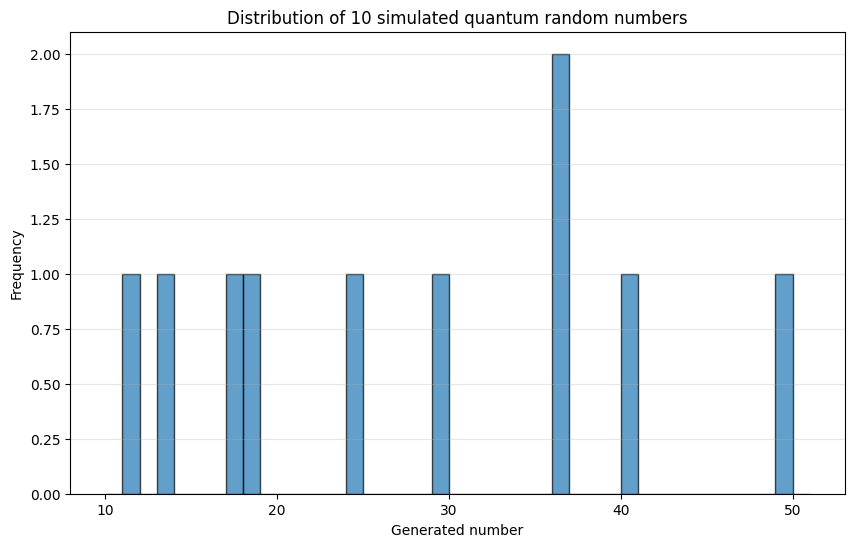

In [43]:


# --- ADDITIONAL BLOCK TO RUN MULTIPLE TIMES AND PLOT A HISTOGRAM ---

import matplotlib.pyplot as plt

# Example usage
n = 10
m = 50

# Number of samples to generate
num_samples = 10  # you can adjust this value

# Generate multiple random numbers using your existing function
results = [generate_random_number(n, m) for _ in range(num_samples)]

# Show the first few generated numbers for verification
print(f"First 10 generated numbers: {results[:10]}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(results, bins=range(n, m + 2), edgecolor='black', alpha=0.7)
plt.title(f"Distribution of {num_samples} simulated quantum random numbers")
plt.xlabel("Generated number")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


# Negative Range

First 10 generated numbers: [-50, -15, -33, -22, -14, -27, -44, -25, -10, -23]


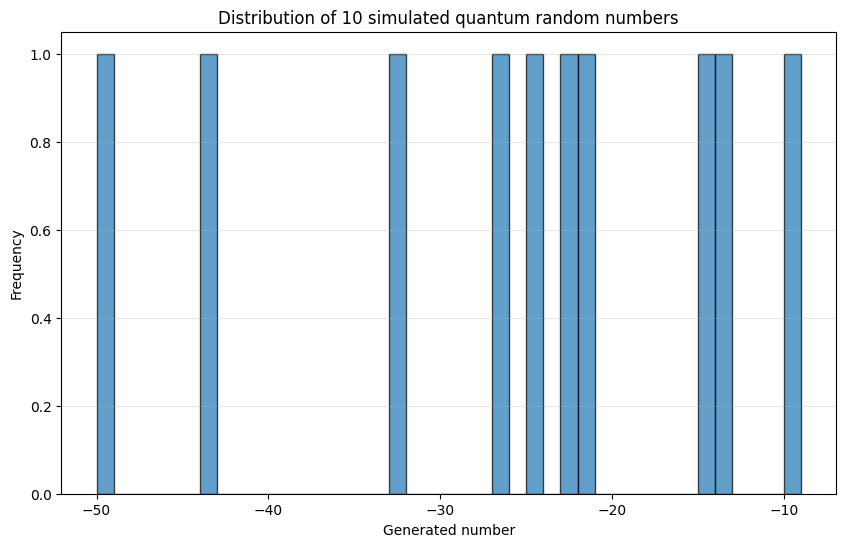

In [41]:


# --- ADDITIONAL BLOCK TO RUN MULTIPLE TIMES AND PLOT A HISTOGRAM ---

import matplotlib.pyplot as plt

# Example usage
n = -50
m = -10

# Number of samples to generate
num_samples = 10  # you can adjust this value

# Generate multiple random numbers using your existing function
results = [generate_random_number(n, m) for _ in range(num_samples)]

# Show the first few generated numbers for verification
print(f"First 10 generated numbers: {results[:10]}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(results, bins=range(n, m + 2), edgecolor='black', alpha=0.7)
plt.title(f"Distribution of {num_samples} simulated quantum random numbers")
plt.xlabel("Generated number")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


# Mixed Range

First 10 generated numbers: [20, 0, -12, 11, -11, 16, 26, 1, 8, -7]


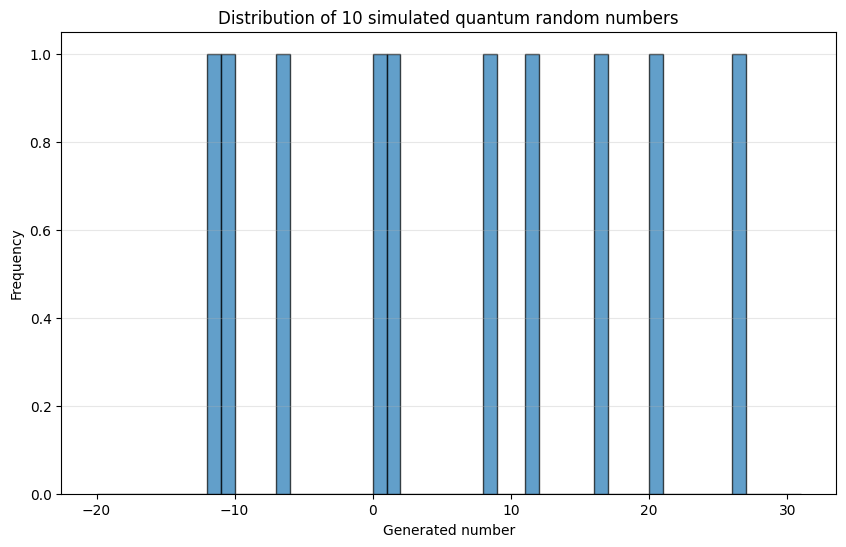

In [42]:
# --- ADDITIONAL BLOCK TO RUN MULTIPLE TIMES AND PLOT A HISTOGRAM ---

import matplotlib.pyplot as plt

# Example usage
n = -20
m = 30

# Number of samples to generate
num_samples = 10  # you can adjust this value

# Generate multiple random numbers using your existing function
results = [generate_random_number(n, m) for _ in range(num_samples)]

# Show the first few generated numbers for verification
print(f"First 10 generated numbers: {results[:10]}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(results, bins=range(n, m + 2), edgecolor='black', alpha=0.7)
plt.title(f"Distribution of {num_samples} simulated quantum random numbers")
plt.xlabel("Generated number")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()